<a href="https://colab.research.google.com/github/AidanLee007/Test-Repo/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

possible research topics


*   What events affected COVID-19 cases and deaths?
*   How were different countries impacted by COVID-19?
*   What differences in regional behavior/responses impact pandemic response?
*   What differences in regional responses affected the deaths:total cases ratio?
*   What differences in regional responses affected the COVID-19 pandemic’s fatality?
    * Vaccinations.
    * Government mandates (mask requirements, gathering sizes/legality).
    * Changing regulations over time.
  






In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
from scipy.stats import ttest_ind

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [5]:
url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df1 = pd.read_csv( url1)

In [6]:
df1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [7]:
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df2 = pd.read_csv(url2)

In [8]:
middf = pd.merge(df, df1, on=['Lat', 'Long'])
display(middf.head())

,Province/State_x,Country/Region_x,Lat,Long,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,...,2/28/23_y,3/1/23_y,3/2/23_y,3/3/23_y,3/4/23_y,3/5/23_y,3/6/23_y,3/7/23_y,3/8/23_y,3/9/23_y
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [9]:
merged_df = pd.merge(df2, middf, on=['Lat', 'Long'])
display(merged_df.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23_y,3/1/23_y,3/2/23_y,3/3/23_y,3/4/23_y,3/5/23_y,3/6/23_y,3/7/23_y,3/8/23_y,3/9/23_y
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [10]:
covid1 = merged_df
covid1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23_y,3/1/23_y,3/2/23_y,3/3/23_y,3/4/23_y,3/5/23_y,3/6/23_y,3/7/23_y,3/8/23_y,3/9/23_y
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [11]:
print(covid1['Country/Region'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'

In [12]:
df_confirmed = df.drop

In [13]:
drop = ['Diamond Princess', 'MS Zaandam', 'Summer Olympics 2020', 'Winter Olympics 2022']
covid = covid1[~covid1['Country/Region'].isin(drop)].copy()
print(covid.shape)
print(covid1.shape)

(268, 3437)
(302, 3437)


In [14]:
covid.shape

(268, 3437)

In [15]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 0 to 301
Columns: 3437 entries, Province/State to 3/9/23_y
dtypes: float64(2), int64(3429), object(6)
memory usage: 7.0+ MB


In [16]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed1 = pd.read_csv(url)

drop = ['Diamond Princess', 'MS Zaandam', 'Summer Olympics 2020', 'Winter Olympics 2022']
df_confirmed = df_confirmed1[~df_confirmed1['Country/Region'].isin(drop)].copy()

id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long']
date_cols = df_confirmed.columns.difference(id_vars)

covid_melted = df_confirmed.melt(
    id_vars=id_vars,
    value_vars=date_cols,
    var_name='Date',
    value_name='Confirmed'
)

#Date to datetime
covid_melted['Date'] = pd.to_datetime(covid_melted['Date'])

covid_grouped = covid_melted.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()

display(covid_grouped.head())

,Date,Country/Region,Confirmed
0,2020-01-22,Afghanistan,0
1,2020-01-22,Albania,0
2,2020-01-22,Algeria,0
3,2020-01-22,Andorra,0
4,2020-01-22,Angola,0


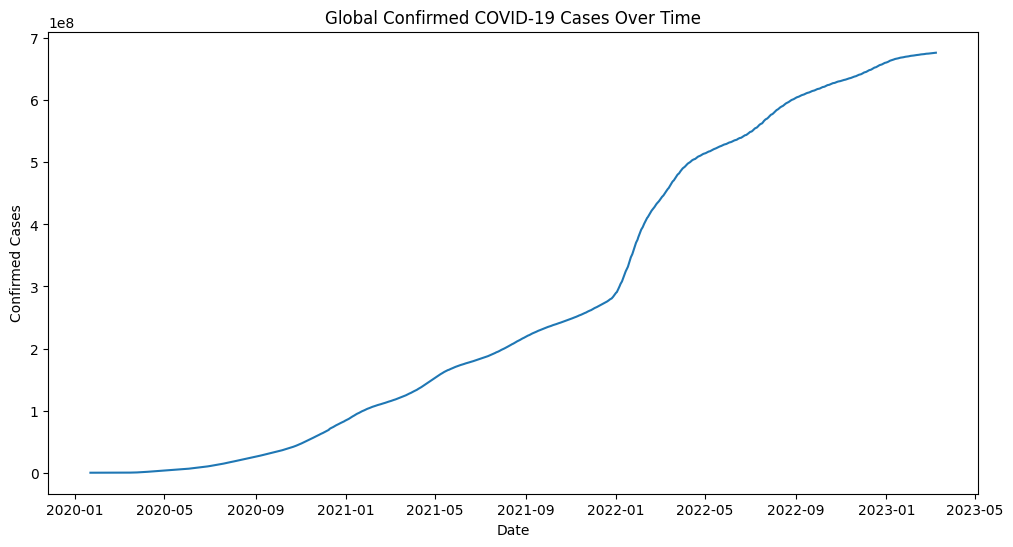

In [17]:
#confirmed covid globally
global_cases = covid_melted.groupby('Date')['Confirmed'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=global_cases, x='Date', y='Confirmed')
plt.title('Global Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

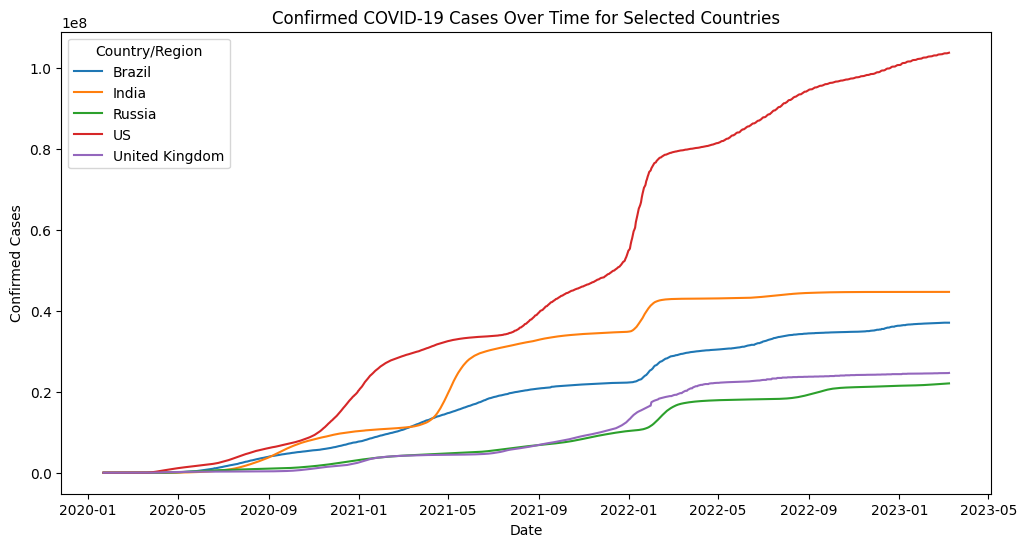

In [18]:
#confirmed cases by country
selected_countries = ['US', 'India', 'Brazil', 'United Kingdom', 'Russia']
selected_covid = covid_grouped[covid_grouped['Country/Region'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_covid, x='Date', y='Confirmed', hue='Country/Region')
plt.title('Confirmed COVID-19 Cases Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

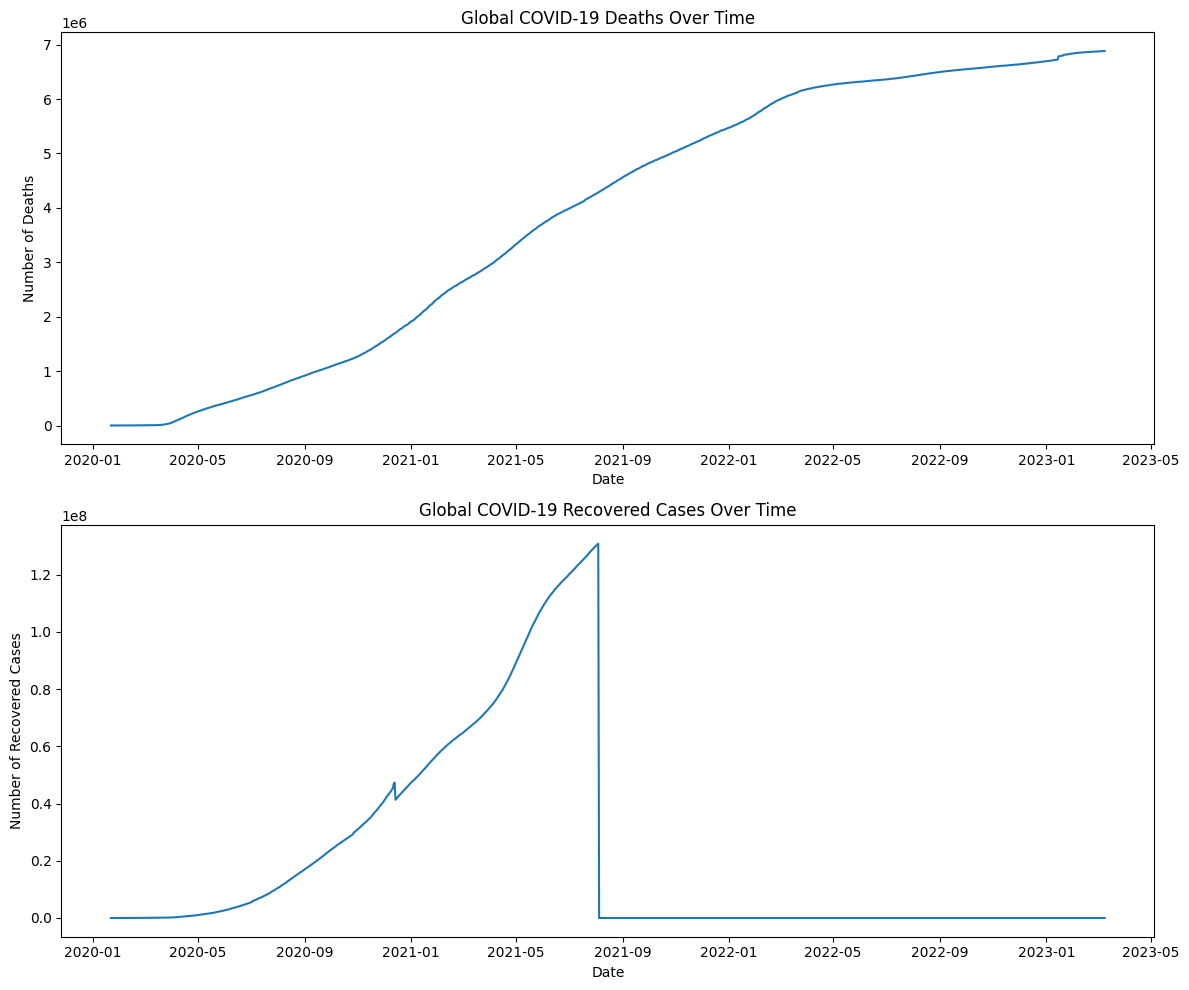

In [19]:
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths = pd.read_csv(url_deaths)

url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(url_recovered)

id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long']
date_cols_deaths = df_deaths.columns.difference(id_vars)
deaths_melted = df_deaths.melt(
    id_vars=id_vars,
    value_vars=date_cols_deaths,
    var_name='Date',
    value_name='Deaths'
)

date_cols_recovered = df_recovered.columns.difference(id_vars)
recovered_melted = df_recovered.melt(
    id_vars=id_vars,
    value_vars=date_cols_recovered,
    var_name='Date',
    value_name='Recovered'
)

#Date to datetime
deaths_melted['Date'] = pd.to_datetime(deaths_melted['Date'])
recovered_melted['Date'] = pd.to_datetime(recovered_melted['Date'])

global_deaths = deaths_melted.groupby('Date')['Deaths'].sum().reset_index()
global_recovered = recovered_melted.groupby('Date')['Recovered'].sum().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

#global deaths
sns.lineplot(data=global_deaths, x='Date', y='Deaths', ax=axes[0])
axes[0].set_title('Global COVID-19 Deaths Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Deaths')

#global recovered
sns.lineplot(data=global_recovered, x='Date', y='Recovered', ax=axes[1])
axes[1].set_title('Global COVID-19 Recovered Cases Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Recovered Cases')

plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (21717,).

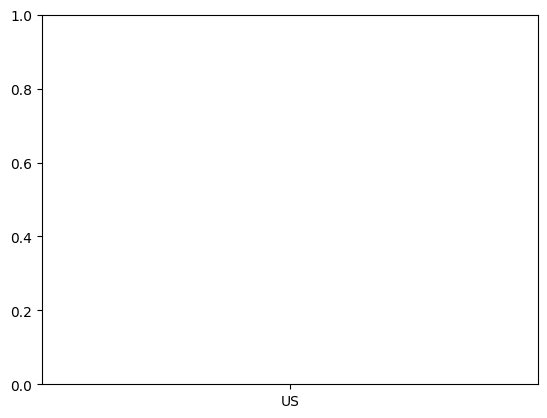

In [20]:
selected_countries = ['US', 'India', 'Brazil', 'United Kingdom', 'Russia']

ratio = pd.merge(covid_melted, deaths_melted, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])
ratio['Death Ratio'] = ratio['Deaths']/ratio['Confirmed']
selected_ratio = ratio[ratio['Country/Region'].isin(selected_countries)]
#sns.lineplot(data = selected_countries)
plt.bar(selected_countries, selected_ratio['Death Ratio'])


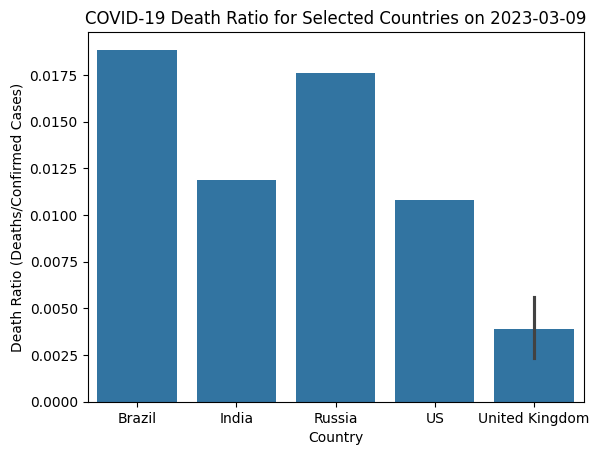

In [21]:
ratio = pd.merge(covid_melted, deaths_melted, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])
ratio['Death Ratio'] = ratio['Deaths']/ratio['Confirmed']

selected_countries = ['US', 'India', 'Brazil', 'United Kingdom', 'Russia']
selected_ratio = ratio[ratio['Country/Region'].isin(selected_countries)]

specific_date = '2023-03-09'
selected_ratio_specific_date = selected_ratio[selected_ratio['Date'] == specific_date]

sns.barplot(data=selected_ratio_specific_date, x='Country/Region', y='Death Ratio')
plt.title(f'COVID-19 Death Ratio for Selected Countries on {specific_date}')
plt.xlabel('Country')
plt.ylabel('Death Ratio (Deaths/Confirmed Cases)')
plt.show()

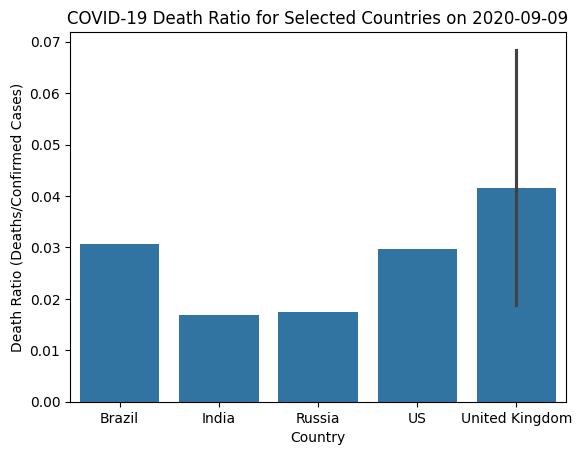

In [22]:
ratio = pd.merge(covid_melted, deaths_melted, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])
ratio['Death Ratio'] = ratio['Deaths']/ratio['Confirmed']

selected_countries = ['US', 'India', 'Brazil', 'United Kingdom', 'Russia']
selected_ratio = ratio[ratio['Country/Region'].isin(selected_countries)]

specific_date = '2020-09-09'
selected_ratio_specific_date = selected_ratio[selected_ratio['Date'] == specific_date]

sns.barplot(data=selected_ratio_specific_date, x='Country/Region', y='Death Ratio')
plt.title(f'COVID-19 Death Ratio for Selected Countries on {specific_date}')
plt.xlabel('Country')
plt.ylabel('Death Ratio (Deaths/Confirmed Cases)')
plt.show()

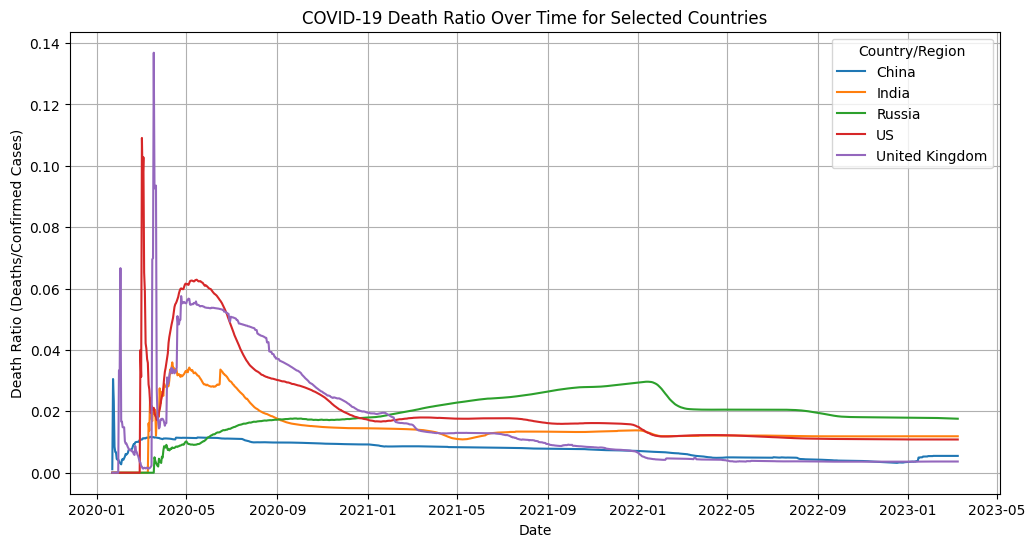

In [23]:
ratio['Death Ratio'] = ratio['Death Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)
selected_countries = ['US', 'India', 'China', 'United Kingdom', 'Russia']
selected_ratio = ratio[ratio['Country/Region'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_ratio, x='Date', y='Death Ratio', hue='Country/Region', errorbar = None)
plt.title('COVID-19 Death Ratio Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Death Ratio (Deaths/Confirmed Cases)')
plt.grid(True)
plt.show()

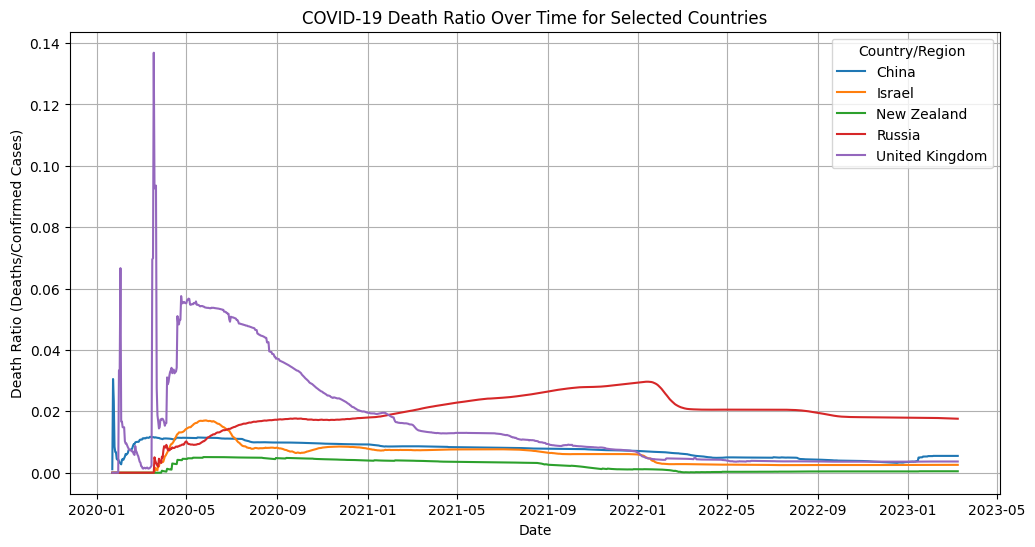

In [24]:
ratio['Death Ratio'] = ratio['Death Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)
selected_countries1 = ['Israel', 'New Zealand', 'China', 'United Kingdom', 'Russia']
selected_ratio1 = ratio[ratio['Country/Region'].isin(selected_countries1)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_ratio1, x='Date', y='Death Ratio', hue='Country/Region', errorbar = None)
plt.title('COVID-19 Death Ratio Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Death Ratio (Deaths/Confirmed Cases)')
plt.grid(True)
plt.show()

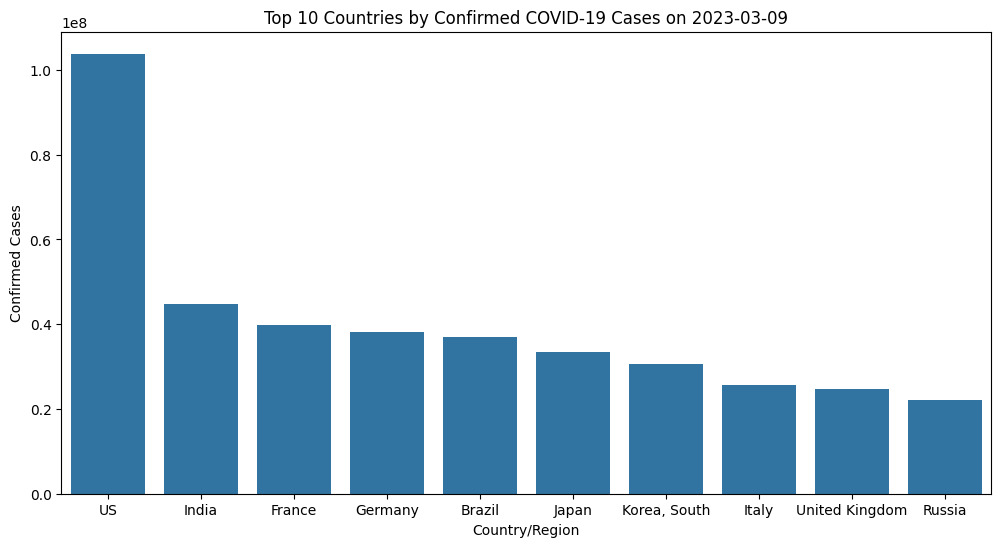

In [25]:
#top countries
last_date = covid_grouped['Date'].max()

last_date_data = covid_grouped[covid_grouped['Date'] == last_date]

top_n_countries = last_date_data.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_countries, x='Country/Region', y='Confirmed')
plt.title(f'Top 10 Countries by Confirmed COVID-19 Cases on {last_date.strftime("%Y-%m-%d")}')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')

plt.show()


*   increasing trend over time
*   global COVID-19 deaths and recovered cases trend upwards
*   US had the most deaths by a lot

